In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/хаки/train.csv')
#trnsctns = pd.read_csv('/content/drive/MyDrive/хаки/trnsctns.csv', sep=';')
#cntrbtrs = pd.read_csv('/content/drive/MyDrive/хаки/cntrbtrs.csv')

In [ ]:
train=train.sort_values(by='quarter')

In [ ]:
train

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
1134816,1,0x6F165383BAEA764C931429EF6AB0491E,0x595B284019C5544DB25382641B9E9F37,1,2,1993,1993Q2,1,53,6,...,-1,-1,-1,142500.0,МОСКОВСКАЯ ОБЛ,1,-1,0,0,0
2352593,1,0x1C9CD9A6C6118C4B9EFBA6CB7706542D,0xAA2F1F3B4ADDF044B6BD82F0AA70C789,1,2,1993,1993Q2,-1,20,27,...,-1,-1,-1,143902.0,МОСКОВСКАЯ ОБЛ,1,-1,0,0,0
13433,1,0x0F40C6A4C338A24C96EE17D25039CFAC,0x68C79ADE1AB1E64F93874F65F862EFDC,1,2,1993,1993Q2,1,41,3,...,-1,-1,-1,0.0,МОСКВА Г,-1,-1,0,0,0
2919690,1,0x5405BD5A7863B84BA6EFD65E5432825E,0xBE11D7A2CCA4FF46AF9EE1F949A6FA75,1,2,1993,1993Q2,1,48,38,...,-1,-1,-1,143085.0,МОСКОВСКАЯ ОБЛ,-1,-1,0,0,0
237366,1,0x45B579866D43004F9726C4E7387ABA29,0x9F432D4EAF10F44EA608A0D780AEEAAE,1,2,1993,1993Q2,-1,68,20,...,-1,-1,-1,140140.0,МОСКОВСКАЯ ОБЛ,-1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442119,0,0x9F6EAA67281E844D98BA219C32AF5C1C,0x1848200188E94B4C8EB0289739B2BA4E,1,3,2023,2023Q1,-1,45,2678,...,1,-1,-1,169711.0,КОМИ РЕСП,1,1,1,0,0
2125528,0,0xA625005056964A2C11ECBEE1CF204D4D,0xA625005056964A2C11ECD5C85EFF0FA5,1,3,2023,2023Q1,1,47,672,...,1,-1,-1,628331.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,1,0,0
435951,0,0x120E533A37B85B498A7C9B7C4FF9A889,0x9A74BC0029260743BB6DB374EE5B1BA8,2,2,2023,2023Q1,1,49,8577,...,1,-1,-1,399056.0,ЛИПЕЦКАЯ ОБЛ,1,1,1,0,0
468480,2,0x5BD8406A6AB94849B4A54BF5AA6E53B0,0x8111005056AB57EC11EC4158D20E967F,1,2,2023,2023Q1,-1,41,795,...,1,-1,-1,652600.0,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ,1,1,1,0,0


подсчет кол-во клиентов с разным кол-во выходов

In [ ]:
client_lives=train.groupby('client_id')['churn'].sum()

In [ ]:
client_lives.value_counts()

churn
0    147781
1     47133
2      3432
3       492
4        97
5        29
6         9
7         4
Name: count, dtype: int64

In [ ]:
client_lives=pd.DataFrame(client_lives).reset_index()
client_lives=client_lives.rename(columns={'churn':"sum_leave"})

In [ ]:
client_lives

,client_id,sum_leave
0,0x000028C241375A43A293708F8664E7DB,0
1,0x0000DA1DA102684DA86AA34E8B91824E,0
2,0x00016EBC958CE044913894AFFDA2DE8C,0
3,0x0001DB44082EAD4C80DE1C883AC9455D,2
4,0x00022D6D30A47A4DBB91611002C43466,0
...,...,...
198972,0xFFFEE17BE57BD7418EF810E539BAAD77,0
198973,0xFFFEE82E24D11548B6519CCA2B9A549E,0
198974,0xFFFF0AE0BF644E4694CD55E936A82944,1
198975,0xFFFF676B994B864AB050B2675F633805,0


добавление нового столбца с суммой выходов для каждого клиента

In [ ]:
train = pd.merge(train, client_lives, on='client_id', how='left')

In [ ]:
train

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,sum_leave
0,1,0x6F165383BAEA764C931429EF6AB0491E,0x595B284019C5544DB25382641B9E9F37,1,2,1993,1993Q2,1,53,6,...,-1,-1,142500.0,МОСКОВСКАЯ ОБЛ,1,-1,0,0,0,0
1,1,0x1C9CD9A6C6118C4B9EFBA6CB7706542D,0xAA2F1F3B4ADDF044B6BD82F0AA70C789,1,2,1993,1993Q2,-1,20,27,...,-1,-1,143902.0,МОСКОВСКАЯ ОБЛ,1,-1,0,0,0,0
2,1,0x0F40C6A4C338A24C96EE17D25039CFAC,0x68C79ADE1AB1E64F93874F65F862EFDC,1,2,1993,1993Q2,1,41,3,...,-1,-1,0.0,МОСКВА Г,-1,-1,0,0,0,0
3,1,0x5405BD5A7863B84BA6EFD65E5432825E,0xBE11D7A2CCA4FF46AF9EE1F949A6FA75,1,2,1993,1993Q2,1,48,38,...,-1,-1,143085.0,МОСКОВСКАЯ ОБЛ,-1,-1,0,0,0,0
4,1,0x45B579866D43004F9726C4E7387ABA29,0x9F432D4EAF10F44EA608A0D780AEEAAE,1,2,1993,1993Q2,-1,68,20,...,-1,-1,140140.0,МОСКОВСКАЯ ОБЛ,-1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589913,0,0x9F6EAA67281E844D98BA219C32AF5C1C,0x1848200188E94B4C8EB0289739B2BA4E,1,3,2023,2023Q1,-1,45,2678,...,-1,-1,169711.0,КОМИ РЕСП,1,1,1,0,0,0
3589914,0,0xA625005056964A2C11ECBEE1CF204D4D,0xA625005056964A2C11ECD5C85EFF0FA5,1,3,2023,2023Q1,1,47,672,...,-1,-1,628331.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,1,1,1,0,0,0
3589915,0,0x120E533A37B85B498A7C9B7C4FF9A889,0x9A74BC0029260743BB6DB374EE5B1BA8,2,2,2023,2023Q1,1,49,8577,...,-1,-1,399056.0,ЛИПЕЦКАЯ ОБЛ,1,1,1,0,0,0
3589916,2,0x5BD8406A6AB94849B4A54BF5AA6E53B0,0x8111005056AB57EC11EC4158D20E967F,1,2,2023,2023Q1,-1,41,795,...,-1,-1,652600.0,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ,1,1,1,0,0,0


среднее значение счетов для каждого клиента

In [ ]:
hh1=train.groupby('client_id')['npo_accnts_nmbr'].mean()

In [ ]:
hh1.sort_values()

client_id
0x000028C241375A43A293708F8664E7DB     1.0
0xA625005056964A2C11ECAD926E70B71B     1.0
0xA625005056964A2C11ECAEAF6FDCBECB     1.0
0xA625005056964A2C11ECAF34C3C1E9BF     1.0
0xA625005056964A2C11ECAF484ABB673F     1.0
                                      ... 
0xE9D880D1A559F945A968FB9B87AEE7AE     8.0
0x94B4FD7CBC6FE846A9539F4A28094721     9.0
0x182FB406C2DD5640970D38536B1D8828     9.0
0x4D99A477D6FE8A47AA6ACD42E44608FF    10.0
0x3143DE85021ADC4E81958A1072B1A52B    16.0
Name: npo_accnts_nmbr, Length: 198977, dtype: float64

просмотр годов

<Axes: >

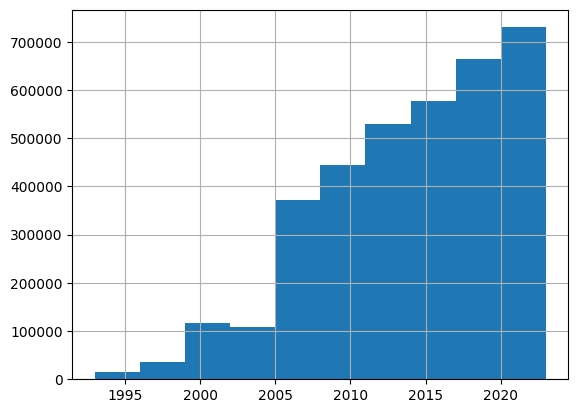

In [ ]:
train['year'].hist()

отбор только мертвых клиентов

In [ ]:
d_train=train[train['sum_leave']==1]

In [ ]:
d_train

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,sum_leave
42,1,0x0598E80315CA274688A529D599DB6110,0xBE72F96D62394E4BB30A3AC392AED5E6,1,2,1993,1993Q2,1,3,0,...,-1,-1,111531.0,МОСКВА Г,-1,-1,0,0,0,1
129,1,0x4F9E629E982ABE49B0AFDDBA507DE873,0x27877D66C6938A4C99429CAAECC1407E,1,2,1993,1993Q2,1,56,5,...,-1,-1,105120.0,МОСКВА Г,1,-1,0,0,0,1
226,1,0x4E718E0ED590ED4394228FD868B10856,0x165ADDD7DC2B244BAAB1F2967B26B236,1,2,1993,1993Q3,1,48,39,...,-1,-1,111538.0,МОСКВА Г,-1,-1,0,0,0,1
261,1,0x51C304AF180B98408EA4890773D9E45E,0x4EBAA478E11EC544A493644EAAAEEE68,1,2,1993,1993Q3,-1,14,17,...,-1,-1,141980.0,МОСКОВСКАЯ ОБЛ,1,-1,0,0,0,1
344,1,0x773632B8498B9240AF2FF21681A6A6B6,0x052D47F2F89A8C4E89F1685347196AB6,1,2,1993,1993Q3,-1,8,4,...,-1,-1,108850.0,МОСКВА Г,-1,-1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589752,0,0x387F30FFECB3044BAE7ED7E99C29199A,0x11A9B6A1823B8D4C877F8FBC62A98536,2,3,2022,2022Q4,-1,52,1194,...,-1,-1,385141.0,АДЫГЕЯ РЕСП,-1,1,0,1,0,1
3589768,0,0xD87F06D6D5E92E46BE5AE88F8D0A2499,0xA62F005056964A2C11EDEFEF2BD5BD69,3,1,2022,2022Q4,1,54,235,...,-1,-1,398508.0,ЛИПЕЦКАЯ ОБЛ,-1,1,0,1,0,1
3589793,0,0x0DF5776DBBEB5E4CA3E74B7A33388303,0x1E407AB37EBB9241819A373175488B13,3,1,2022,2022Q4,1,52,2039,...,-1,-1,398059.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0,1
3589799,0,0x05413D7109859E4F90E150F38A47F61E,0xA62F005056964A2C11EDF0C680E6378B,2,3,2022,2022Q4,1,42,234,...,-1,-1,665827.0,ИРКУТСКАЯ ОБЛ,1,1,0,1,0,1


все кварталы

In [ ]:
d_train['quarter'].unique()

array(['1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2', '1994Q3',
       '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4', '1996Q1',
       '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2', '1997Q3',
       '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4', '1999Q1',
       '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2', '2000Q3',
       '2000Q4', '2001Q1', '2001Q2', '2001Q3', '2001Q4', '2002Q1',
       '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2', '2003Q3',
       '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1',
       '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3',
       '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1',
       '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3',
       '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1',
       '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3',
       '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015

перевод временных меток из "Сколько клиент жил?" в "через сколько клиент умрет?"

In [ ]:
import pandas as pd


# Сгруппировать данные по user_id и вычислить максимальное значение временной метки в каждой группе
max_timestamps = d_train.groupby('client_id')['clnt_cprtn_time_d'].max()

# Объединить максимальные значения с исходным DataFrame
d_train = d_train.merge(max_timestamps.rename('max_timestamp'), on='client_id')

# Вычесть максимальное значение временной метки из каждой временной метки в группе
d_train['time_diff'] = d_train['max_timestamp'] - d_train['clnt_cprtn_time_d']
d_train=d_train.drop(['max_timestamp'], axis=1)



просмотр всех отчетов по одному пользователю

In [ ]:
user=d_train[d_train['client_id']=='0x0D18081E0556AF4F95A931FBA4159D52']

In [ ]:
user

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,sum_leave,time_diff
329326,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2007,2007Q1,1,44,68,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3652
329327,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2007,2007Q2,1,44,159,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3561
329328,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2007,2007Q3,1,44,251,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3469
329329,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2007,2007Q4,1,44,343,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3377
329330,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2008,2008Q1,1,45,433,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3287
329331,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2008,2008Q2,1,45,524,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3196
329332,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2008,2008Q3,1,45,616,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3104
329333,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2008,2008Q4,1,45,708,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,3012
329334,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2009,2009Q1,1,46,798,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,2922
329335,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2009,2009Q2,1,46,889,...,-1,302038.0,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,1,2831


In [ ]:
user[['quarter','clnt_cprtn_time_d','time_diff']].sort_values(by='quarter')

,quarter,clnt_cprtn_time_d,time_diff
329326,2007Q1,68,3652
329327,2007Q2,159,3561
329328,2007Q3,251,3469
329329,2007Q4,343,3377
329330,2008Q1,433,3287
329331,2008Q2,524,3196
329332,2008Q3,616,3104
329333,2008Q4,708,3012
329334,2009Q1,798,2922
329335,2009Q2,889,2831


In [ ]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690807 entries, 0 to 690806
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   slctn_nmbr              690807 non-null  int64  
 1   client_id               690807 non-null  object 
 2   npo_account_id          690807 non-null  object 
 3   npo_accnts_nmbr         690807 non-null  int64  
 4   pmnts_type              690807 non-null  int64  
 5   year                    690807 non-null  int64  
 6   quarter                 690807 non-null  object 
 7   gender                  690807 non-null  int64  
 8   age                     690807 non-null  int64  
 9   clnt_cprtn_time_d       690807 non-null  int64  
 10  actv_prd_d              690807 non-null  int64  
 11  lst_pmnt_rcnc_d         690807 non-null  int64  
 12  balance                 690807 non-null  float64
 13  oprtn_sum_per_qrtr      690807 non-null  float64
 14  oprtn_sum_per_year  

удаление не числовых столбцов

In [ ]:
d_train=d_train.drop(['npo_account_id','region','lst_pmnt_date_per_qrtr','frst_pmnt_date','year'],axis=1)

In [ ]:
d_train

,slctn_nmbr,client_id,npo_accnts_nmbr,pmnts_type,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,...,assignee_npo,assignee_ops,postal_code,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,sum_leave,time_diff
0,1,0x0598E80315CA274688A529D599DB6110,1,2,1993Q2,1,3,0,0,0,...,-1,-1,111531.0,-1,-1,0,0,0,1,8950
1,1,0x0598E80315CA274688A529D599DB6110,1,2,1993Q4,1,3,184,146,146,...,-1,-1,111531.0,-1,-1,0,0,0,1,8766
2,1,0x0598E80315CA274688A529D599DB6110,1,2,1994Q1,1,4,274,146,128,...,-1,-1,111531.0,-1,-1,0,0,0,1,8676
3,1,0x0598E80315CA274688A529D599DB6110,1,2,1994Q3,1,4,457,146,311,...,-1,-1,111531.0,-1,-1,0,0,0,1,8493
4,1,0x0598E80315CA274688A529D599DB6110,1,2,1994Q4,1,4,549,146,403,...,-1,-1,111531.0,-1,-1,0,0,0,1,8401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690802,0,0xA62B005056964A2C11EDBC1B65F8C97A,1,3,2022Q3,-1,53,171,153,33,...,-1,-1,662159.0,1,1,0,1,1,1,0
690803,0,0xA631005056964A2C11EE377311A103DB,1,3,2022Q3,-1,44,17,0,0,...,-1,-1,452686.0,1,-1,0,1,1,1,0
690804,0,0xA631005056964A2C11EE351BA09ECB1B,1,3,2022Q3,-1,39,22,0,0,...,-1,-1,660006.0,1,-1,0,1,1,1,0
690805,0,0xA62F005056964A2C11EE05061C1D13C2,1,3,2022Q3,1,41,114,97,34,...,-1,-1,453864.0,-1,-1,0,1,1,1,0


In [ ]:
pp=d_train.groupby(['client_id','quarter']).mean()

In [ ]:
pp

slctn_nmbr  npo_accnts_nmbr  \
client_id                          quarter                                
0x0003085F2E86484887D3EF669716BB81 2020Q2          0.0              1.0   
                                   2020Q3          0.0              1.0   
                                   2020Q4          0.0              1.0   
                                   2021Q1          0.0              1.0   
                                   2021Q2          0.0              1.0   
...                                                ...              ...   
0xFFF7B06D4D31DD47B8C2F235003329C9 2022Q4          0.0              2.0   
0xFFFF0AE0BF644E4694CD55E936A82944 2013Q1          1.0              2.0   
                                   2013Q2          1.0              2.0   
                                   2013Q3          1.0              2.0   
                                   2013Q4          1.0              2.0   

                                            pmnts_type  gender   age  \
client_id                          quarter                             
0x0003085F2E86484887D3EF669716BB81 2020Q2          3.0     1.0  34.0   
                                   2020Q3          3.0     1.0  34.0   
                                   2020Q4          3.0     1.0  34.0   
                                   2021Q1          3.0     1.0  35.0   
                                   2021Q2          3.0     1.0  35.0   
...                                                ...     ...   ...   
0xFFF7B06D4D31DD47B8C2F235003329C9 2022Q4          1.0     1.0  53.0   
0xFFFF0AE0BF644E4694CD55E936A82944 2013Q1          2.0    -1.0  40.0   
                                   2013Q2          2.0    -1.0  40.0   
                                   2013Q3          2.0    -1.0  40.0   
                                   2013Q4          2.0    -1.0  40.0   

                                            clnt_cprtn_time_d  actv_prd_d  \
client_id                          quarter                                  
0x0003085F2E86484887D3EF669716BB81 2020Q2               100.0        28.0   
                                   2020Q3               192.0       123.0   
                                   2020Q4               284.0       214.0   
                                   2021Q1               374.0       304.0   
                                   2021Q2               465.0       396.0   
...                                                       ...         ...   
0xFFF7B06D4D31DD47B8C2F235003329C9 2022Q4              2064.0      2013.0   
0xFFFF0AE0BF644E4694CD55E936A82944 2013Q1                89.0        61.0   
                                   2013Q2               180.0       157.0   
                                   2013Q3               272.0       243.0   
                                   2013Q4               364.0       334.0   

                                            lst_pmnt_rcnc_d    balance  \
client_id                          quarter                               
0x0003085F2E86484887D3EF669716BB81 2020Q2               0.0   10893.48   
                                   2020Q3              32.0   49103.83   
                                   2020Q4              59.0   65428.96   
                                   2021Q1              31.0   80908.87   
                                   2021Q2              31.0  114946.28   
...                                                     ...        ...   
0xFFF7B06D4D31DD47B8C2F235003329C9 2022Q4              30.0  186474.90   
0xFFFF0AE0BF644E4694CD55E936A82944 2013Q1               0.0    1182.93   
                                   2013Q2              30.0    2365.85   
                                   2013Q3              30.0    3548.78   
                                   2013Q4              35.0    4798.29   

                                            oprtn_sum_per_qrtr  ...  \
client_id                          quarter                      ...   
0x0003085F2E86484887D3EF

In [ ]:
"""
import pandas as pd

# Ваши данные
#quarters = ['2010Q1', '2007Q4', '2007Q3', '2004Q4', '2019Q4', '2006Q4', '2011Q4', '2020Q4', '2010Q2', '2015Q2', '2012Q1', '2022Q4', '2010Q4', '2008Q4', '2005Q2', '2013Q4', '2022Q1', '2014Q3', '2018Q4', '2015Q4', '2011Q2', '2021Q4', '2009Q3', '2014Q2', '2019Q1', '2007Q1', '2022Q3', '2015Q1', '2018Q3', '2020Q1', '2011Q1', '2019Q3', '2010Q3', '2009Q4', '2021Q3', '2005Q1', '2014Q4', '2011Q3', '2012Q3', '2020Q3', '2006Q3', '2009Q1', '2016Q2', '2014Q1', '2017Q2', '2008Q1', '2012Q2', '2012Q4', '2019Q2', '2013Q2', '2016Q1', '2021Q1', '2017Q1', '2006Q2', '2013Q1', '2008Q2', '2022Q2', '2015Q3', '2017Q3', '2008Q3', '2017Q4', '2006Q1', '2009Q2', '2018Q1', '2007Q2', '2016Q4', '2016Q3', '2018Q2', '2005Q3', '2020Q2', '2005Q4', '2013Q3', '2021Q2', '2004Q2', '2000Q3', '1999Q3', '2004Q3', '2002Q3', '2004Q1', '2001Q2', '1993Q4', '1995Q4', '1994Q2', '2000Q1', '1996Q1', '2003Q4', '1996Q4', '1996Q3', '2002Q1', '2003Q1', '1999Q1', '1994Q4', '2001Q1', '2000Q2', '1999Q2', '2003Q2', '1996Q2', '1998Q1', '1997Q1', '1993Q3', '2001Q4', '1994Q1', '2002Q4', '1997Q2', '2002Q2', '1994Q3', '2001Q3', '1999Q4', '1997Q3', '2003Q3', '2000Q4', '1997Q4', '1998Q3', '1995Q2', '1995Q1', '1998Q2', '1998Q4', '1993Q2', '1995Q3']
quarters = d_train['quarter']
# Разбиваем значения кварталов на год и номер квартала
years = [int(x[:4]) for x in quarters]
quarters_nums = [x[4:] for x in quarters]

q_2_n={'Q1':3,'Q2':6,'Q3':9,'Q4':12}
# Определяем последний месяц квартала
months = [q_2_n[q_num] for q_num in quarters_nums]

# Создаем DataFrame с новыми данными
new_data = {'quarter': quarters, 'year': years, 'quarter_num': quarters_nums, 'month': months}
df = pd.DataFrame(new_data)

# Выводим DataFrame
print(df)
"""


       quarter  year quarter_num  month
0       1993Q2  1993          Q2      6
1       1993Q4  1993          Q4     12
2       1994Q1  1994          Q1      3
3       1994Q3  1994          Q3      9
4       1994Q4  1994          Q4     12
...        ...   ...         ...    ...
690802  2022Q3  2022          Q3      9
690803  2022Q3  2022          Q3      9
690804  2022Q3  2022          Q3      9
690805  2022Q3  2022          Q3      9
690806  2022Q3  2022          Q3      9

[690807 rows x 4 columns]


In [ ]:
pp.to_csv('prepare_data.csv')